# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction-to-Computer-Vision" data-toc-modified-id="Introduction-to-Computer-Vision-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Computer Vision</a></div><div class="lev2 toc-item"><a href="#2A-L5:-15" data-toc-modified-id="2A-L5:-15-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>2A-L5: 15</a></div><div class="lev2 toc-item"><a href="#2A-L6:-8" data-toc-modified-id="2A-L6:-8-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2A-L6: 8</a></div><div class="lev2 toc-item"><a href="#3A-L1:-12" data-toc-modified-id="3A-L1:-12-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3A-L1: 12</a></div>

# Introduction to Computer Vision

## 2A-L5: 15

In [11]:
pkg load image;

In [82]:
% Gradient Direction
function result = select_gdir0(gmag, gdir, mag_min, angle_low, angle_high)
    % TODO Find and return pixels that fall within the desired mag, angle range
    gmag(gmag < mag_min) = 0;
    gmag(angle_low > gdir) = 0;
    gmag(gdir > angle_high) = 0;
    result = gmag;
endfunction

function result = select_gdir(gmag, gdir, mag_min, angle_low, angle_high)
    % TODO Find and return pixels that fall within the desired mag, angle range
    % gmag(gmag < mag_min) = 0;
    % gmag(gdir < angle_low) = 0;
    % gmag(gdir > angle_high) = 0;
    % result = gmag;
    result = gmag >= mag_min & angle_low <= gdir & gdir <= angle_high;
endfunction

In [83]:
assert(    
    select_gdir0(gmag, gdir, 1, 30, 60) == select_gdir(gmag, gdir, 1, 30, 60)
)

error: assert (select_gdir0 (gmag, gdir, 1, 30, 60) == select_gdir (gmag, gdir, 1, 30, 60)) failed
error: called from
    assert at line 92 column 11


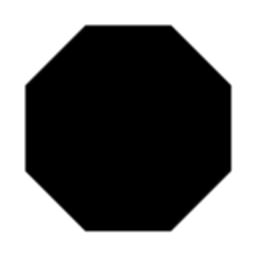

In [10]:
%% Load and convert image to double type, range [0, 1] for convenience
img = double(imread('octagon.png')) / 255.; 
imshow(img); % assumes [0, 1] range for double images

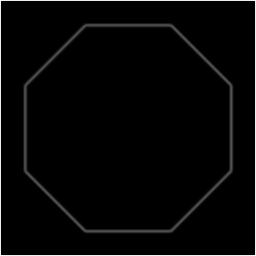

In [13]:
%% Compute x, y gradients
[gx gy] = imgradientxy(img, 'sobel'); % Note: gx, gy are not normalized

%% Obtain gradient magnitude and direction
[gmag gdir] = imgradient(gx, gy);
imshow(gmag / (4 * sqrt(2))); % mag = sqrt(gx^2 + gy^2), so [0, (4 * sqrt(2))]

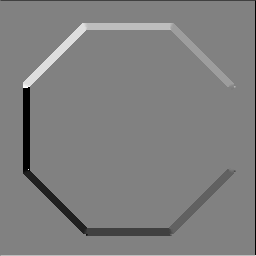

In [18]:
imshow((gdir + 180.0) / 360.0); % angle in degrees [-180, 180]

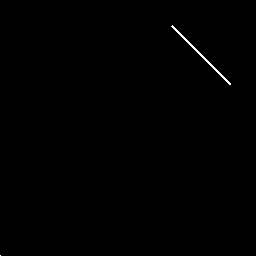

In [84]:
%% Find pixels with desired gradient direction
my_grad = select_gdir(gmag, gdir, 1, 30, 60); % 45 +/- 15

imshow(my_grad);  % NOTE: enable after you've implemented select_gdir

## 2A-L6: 8

In [87]:
% edge(img, 'canny')

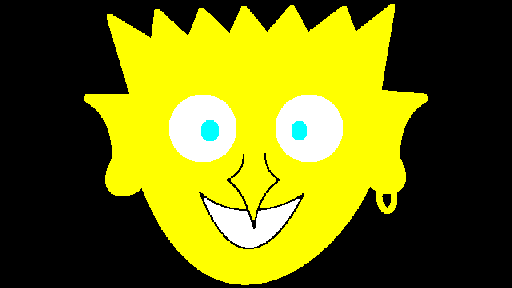

In [88]:
frizzy = imread('frizzy.png');
froomer = imread('froomer.png');
imshow(frizzy);

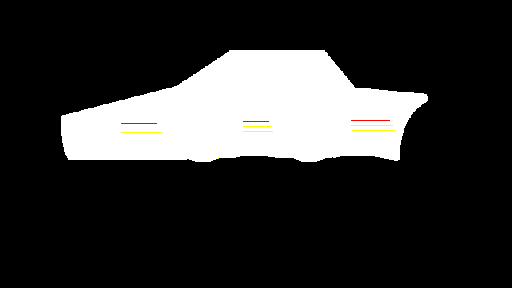

In [90]:
imshow(froomer);

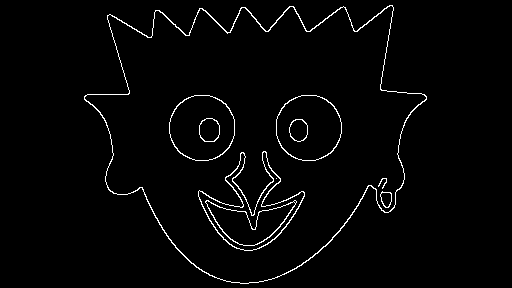

In [117]:
% TODO: Find edges in frizzy and froomer images
gfrizzy = rgb2gray(frizzy);
efrizzy = edge(gfrizzy, 'canny');

imshow(efrizzy);

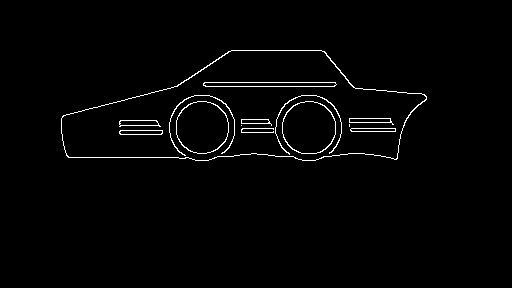

In [118]:
gfroomer = rgb2gray(froomer);
efroomer = edge(gfroomer, 'canny');

imshow(efroomer);

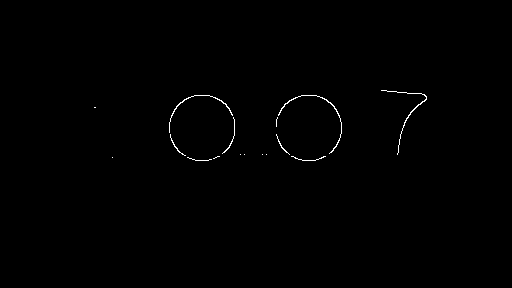

In [120]:
% TODO: Display common edge pixels
imgcommon = efrizzy & efroomer;

imshow(imgcommon);
% imgcommon

## 3A-L1: 12

In [14]:
# Thin lens equation 
# (1/||z'||)+(1/||z||) = 1/f
# arctan((d/2)/f)

In [35]:
% z
d = 35 % mm
w = 700 % mm
f = 50 % mm

% z' = (d*f)/w+f
z1 = (d*f)/w+f
assert(z1 == 52.5)
% z = (w/d)*z'
z = (w/d)*z1
assert(z/1000 == 1.05)

d =  35
w =  700
f =  50
z1 =  52.500
z =  1050


c =  52.974
b =  50.000
z1 =  50.000
error: assert (z1 == 52.5) failed
error: called from
    assert at line 92 column 11
